In [2]:
# Import the required libraries and dependencies
import prophet
import pandas as pd
import datetime as dt
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
# Read the data from the csv file into a Pandas Dataframe
# data_df = pd.read_csv("") - Completed
# to display display(data_df.head()) - Completed

CSIQ_df = pd.read_csv('./data/CSIQ.csv' , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
DQ_df = pd.read_csv('./data/DQ.csv'     , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
ENPH_df = pd.read_csv('./data/ENPH.csv' , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
FSLR_df = pd.read_csv('./data/FSLR.csv' , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
JKS_df = pd.read_csv('./data/JKS.csv'   , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
SEDG_df = pd.read_csv('./data/SEDG.csv' , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
SPWR_df = pd.read_csv('./data/SPWR.csv' , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)


C:\Users\lovel\AppData\Local\Temp\ipykernel_4172\1875043608.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  CSIQ_df = pd.read_csv('./data/CSIQ.csv' ,
C:\Users\lovel\AppData\Local\Temp\ipykernel_4172\1875043608.py:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  DQ_df = pd.read_csv('./data/DQ.csv'     ,
C:\Users\lovel\AppData\Local\Temp\ipykernel_4172\1875043608.py:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pd

In [4]:
# Displaying DataFrames 
# Verified DataFrames have been imported.
display(CSIQ_df.head())
display(DQ_df.head())
display(ENPH_df.head())
display(FSLR_df.head())
display(JKS_df.head())
display(SEDG_df.head())
display(SPWR_df.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,22.360001,22.540001,22.040001,22.520000,22.520000,643300
2020-01-03,22.190001,22.440001,21.590000,21.799999,21.799999,809600
2020-01-06,21.309999,22.330000,21.100000,22.320000,22.320000,938000
2020-01-07,22.290001,22.600000,22.219999,22.360001,22.360001,596900
2020-01-08,22.370001,22.709999,22.110001,22.570000,22.570000,709800


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,10.240,11.032,10.240,10.996,10.996,1278000
2020-01-03,10.956,11.102,10.810,10.890,10.890,879500
2020-01-06,10.838,10.840,10.502,10.770,10.770,621000
2020-01-07,10.698,10.834,10.560,10.672,10.672,475500
2020-01-08,10.682,10.932,10.682,10.876,10.876,773500


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,26.370001,29.350000,26.040001,29.340000,29.340000,7775400
2020-01-03,28.790001,29.730000,28.379999,29.290001,29.290001,4811000
2020-01-06,29.049999,29.660000,27.830000,29.660000,29.660000,4628800
2020-01-07,29.820000,30.200001,28.660000,29.990000,29.990000,5363100
2020-01-08,29.680000,31.500000,29.440001,31.000000,31.000000,5446100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,56.400002,57.259998,55.959999,57.240002,57.240002,1053800
2020-01-03,57.110001,57.660000,56.709999,57.020000,57.020000,943700
2020-01-06,56.009998,56.419998,54.779999,55.830002,55.830002,1535100
2020-01-07,55.759998,57.310001,55.759998,56.669998,56.669998,974200
2020-01-08,56.860001,57.110001,56.160000,56.700001,56.700001,725700


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,22.790001,23.850000,22.590000,23.84,22.810047,1130300
2020-01-03,23.170000,23.650000,22.480000,22.59,21.614050,1319300
2020-01-06,21.969999,22.570000,21.799999,22.49,21.518370,997800
2020-01-07,22.650000,23.000000,22.559999,22.74,21.757568,592700
2020-01-08,22.480000,22.540001,21.959999,22.23,21.269602,856900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,97.000000,101.879997,96.750000,101.809998,101.809998,2154800
2020-01-03,100.839996,103.599998,100.019997,102.379997,102.379997,1016500
2020-01-06,101.370003,101.879997,98.635002,99.629997,99.629997,970800
2020-01-07,100.000000,102.029999,97.699997,101.790001,101.790001,834900
2020-01-08,101.190002,105.680000,101.190002,104.160004,104.160004,1041300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.173543,5.173543,5.029470,5.127701,5.127701,2764786
2020-01-03,5.062213,5.094957,4.813360,4.826457,4.826457,7053366
2020-01-06,4.734774,4.937787,4.643091,4.891945,4.891945,5552325
2020-01-07,4.905043,5.094957,4.833006,5.003274,5.003274,3223344
2020-01-08,4.963982,5.101506,4.885396,5.029470,5.029470,4496252


In [5]:
# create a new Data frame with just the date and close columns
# new variable_df = old_df[{"Date" , "Close"}]
# Coding comes per our group conversation on THU 4/11/24

csiq_df = CSIQ_df[["Close"]]
dq_df = DQ_df[["Close"]]
enph_df = ENPH_df[["Close"]]
fslr_df = FSLR_df[["Close"]]
jks_df = JKS_df[["Close"]]
sedg_df = SEDG_df[["Close"]]
spwr_df = SPWR_df[["Close"]]



In [6]:
# Rename the close column in this cleaning step
# new variable_df = new variable_df.rename(columns = {"Close" : "STOCK SYMBOL"})
# Coding comes per our group conversation on THU 4/11/24

csiq_df = csiq_df.rename(columns = {"Close" : "CSIQ_Close"})
dq_df = dq_df.rename(columns = {"Close" : "DQ_Close"})
enph_df = enph_df.rename(columns = {"Close" : "ENPH_Close"})
fslr_df = fslr_df.rename(columns = {"Close" : "FSLR_Close"})
jks_df = jks_df.rename(columns = {"Close" : "JKS_Close"})
sedg_df = sedg_df.rename(columns = {"Close" : "SEDG_Close"})
spwr_df = spwr_df.rename(columns = {"Close" : "SPWR_Close"})

In [7]:
# Displaying to ensure columns have the correct title.
# display(csiq_df.head())
# display(dq_df.head())
# display(enph_df.head())
# display(fslr_df.head())
# display(jks_df.head())
# display(sedg_df.head())
# display(spwr_df.head())

Plotting the general trends for years 2020 to 2024

In [8]:
# Plot the DataFrame
# Lesson 07 - Data Visualizations

CSIQ - Canadian Solar Industry 

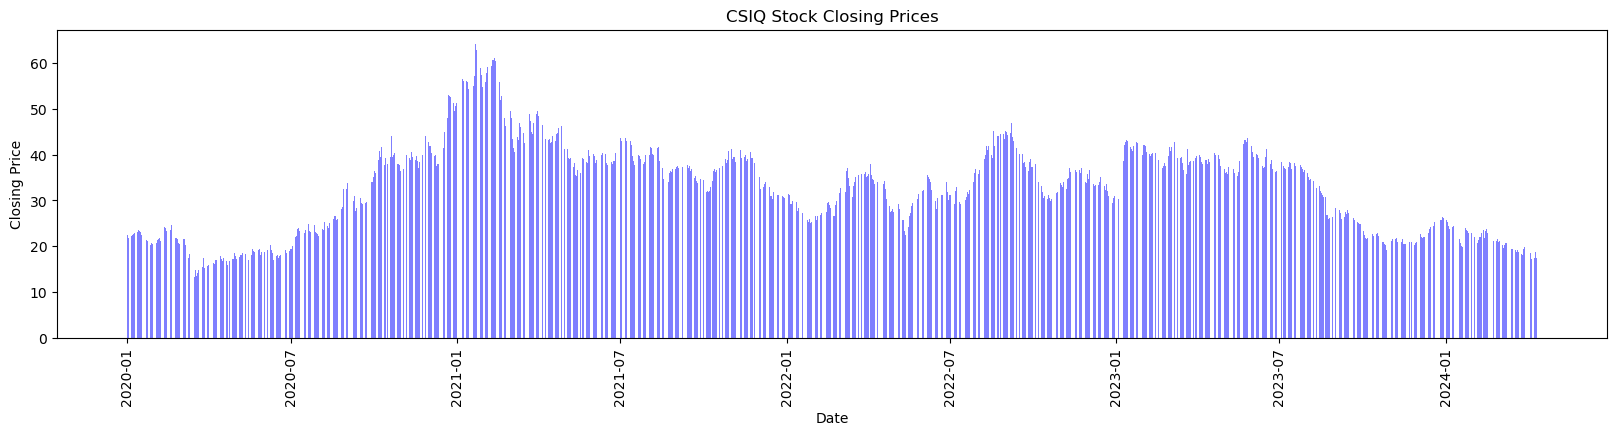

In [9]:
csiq_df.reset_index(inplace=True)
plt.figure(figsize=(20, 4))
plt.bar(csiq_df['Date'], csiq_df["CSIQ_Close"], color='b', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('CSIQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


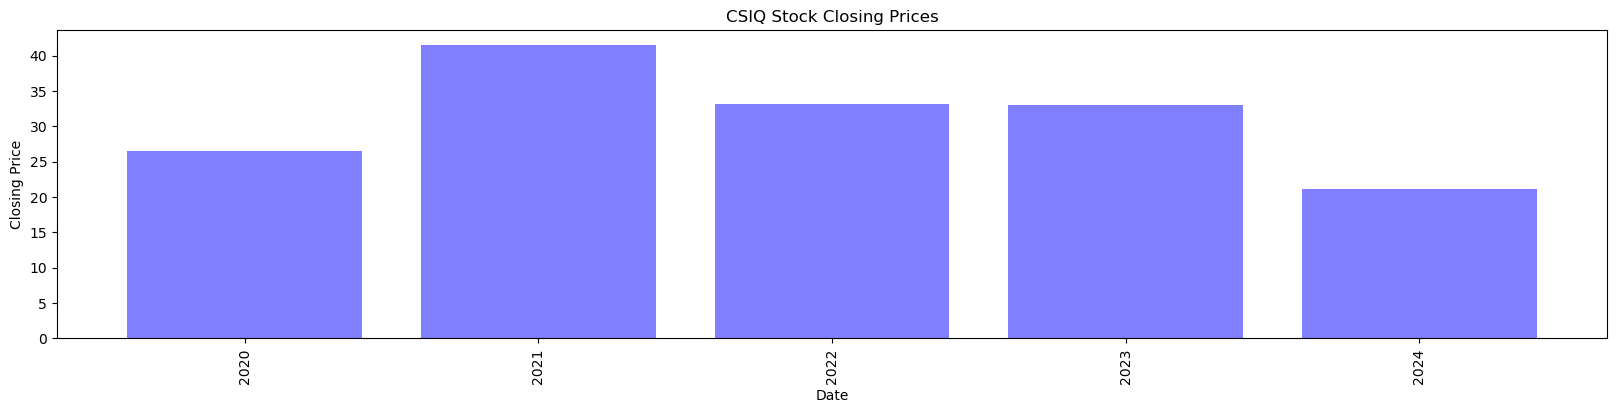

In [10]:
csiq_df['Date'] = pd.to_datetime(csiq_df['Date'])
csiq_df['Year'] = csiq_df['Date'].dt.year
average_price_by_year = csiq_df.groupby('Year')['CSIQ_Close'].mean()
tick_locations = range(len(average_price_by_year))
x_labels = [str(year) for year in average_price_by_year.index]
plt.figure(figsize=(20, 4))
plt.bar(x_labels, average_price_by_year, color='b', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title('CSIQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

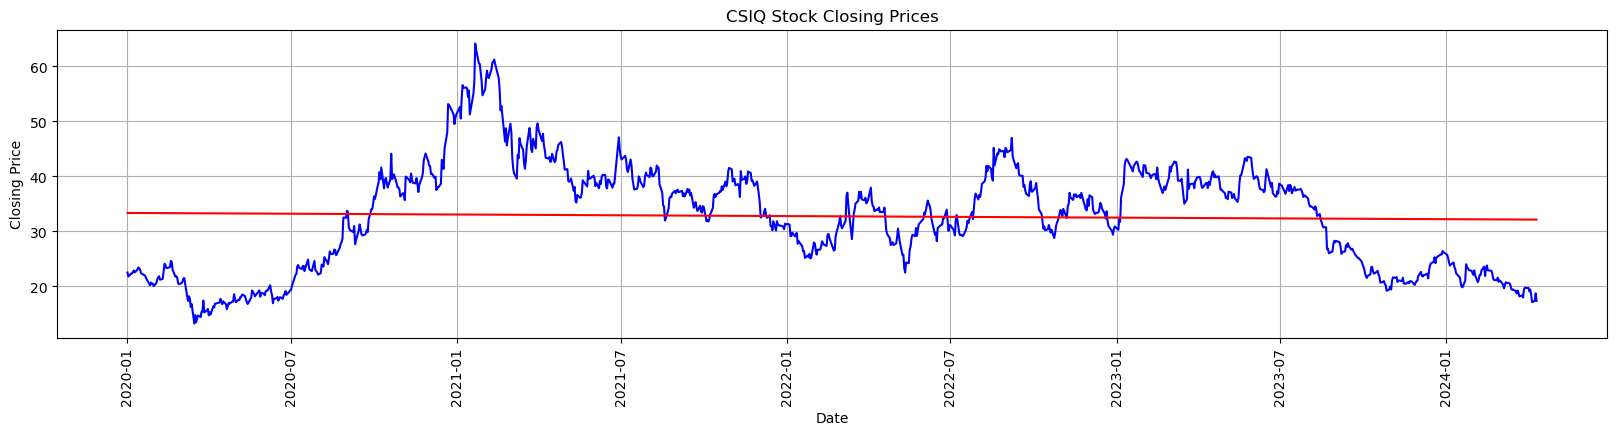

In [11]:
# Lessom 08 -  Use Prophet to see daily/yearly trends
# Example 


csiq_df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 4))
plt.plot(csiq_df['Date'], csiq_df["CSIQ_Close"], color='b', linestyle='-')

X = np.arange(len(csiq_df)).reshape(-1, 1)  
y = csiq_df['CSIQ_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

plt.plot(csiq_df['Date'], trend, label='Linear Trend', color='red')
plt.xticks(rotation="vertical")
plt.title('CSIQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [12]:
#Lesson 08 - NOT NEEDED
# prophet_df = csiq_df[['Date', 'CSIQ_Close']].rename(columns={'Date': 'ds', 'CSIQ_Close': 'y'})

# # Instantiate and fit the Prophet model
# prophet_model = Prophet()
# prophet_model.fit(prophet_df)

# # # Make future predictions with Prophet
# # future = prophet_model.make_future_dataframe(periods=365)  
# # forecast = prophet_model.predict(future)

# # Plot the forecast
# plt.figure(figsize=(20, 4))
# plt.plot(csiq_df['Date'], csiq_df["CSIQ_Close"], color='b', linestyle='-', label='Actual')
# # plt.plot(forecast['ds'], forecast['yhat'], color='red', linestyle='-', label='Forecast')
# # plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
# plt.xticks(rotation="vertical")
# plt.title('CSIQ Stock Closing Prices Forecast')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.legend()
# plt.grid(True)
# plt.show()

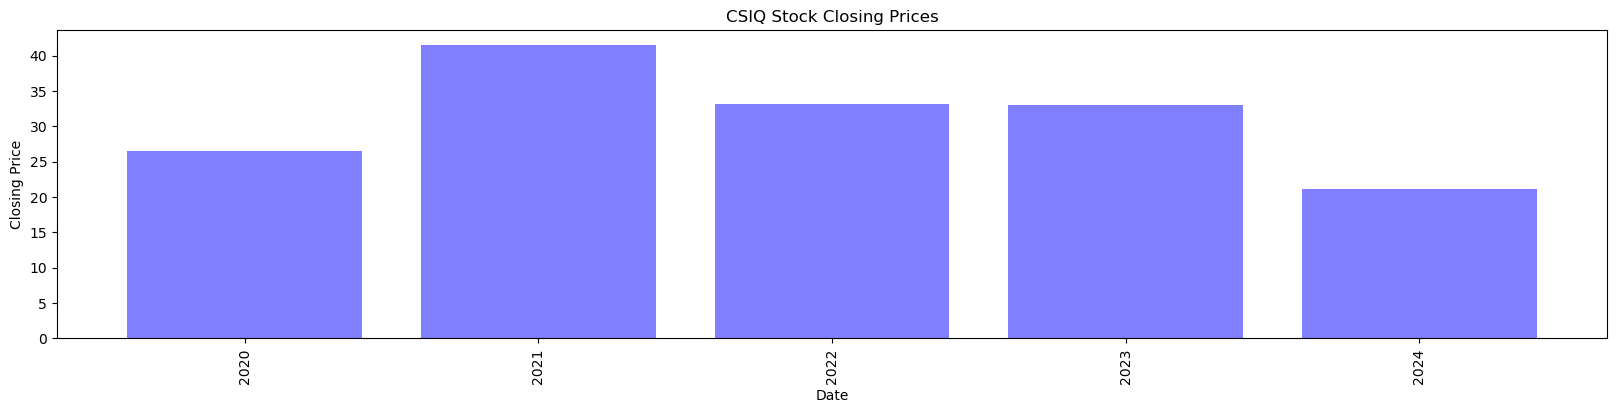

In [13]:
# Converting the Date column from daily to yearly.
# Reprinting figure to show yearly closing prices.

csiq_df['Date'] = pd.to_datetime(csiq_df['Date'])
csiq_df['Year'] = csiq_df['Date'].dt.year
average_price_by_year = csiq_df.groupby('Year')['CSIQ_Close'].mean()
tick_locations = range(len(average_price_by_year))
x_labels = [str(year) for year in average_price_by_year.index]
plt.figure(figsize=(20, 4))
plt.bar(x_labels, average_price_by_year, color='b', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title('CSIQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


In [14]:
# #Summary Statistics
# Lesson 08 - Use the pct change function to calculate returns

csiq_df['Year'] = csiq_df['Date'].dt.year
csiq_returns = csiq_df['CSIQ_Close'].pct_change()
csiq_df['Daily_Return'] = csiq_df['CSIQ_Close'].pct_change()
yearly_summary_statistics_csiq = csiq_df.groupby('Year')['Daily_Return'].describe()
print("Summary statistics for CSIQ stock on a yearly basis:")
print(yearly_summary_statistics_csiq)



Summary statistics for CSIQ stock on a yearly basis:
      count      mean       std       min       25%       50%       75%  \
Year                                                                      
2020  252.0  0.004277  0.044777 -0.211905 -0.018642  0.001740  0.029783   
2021  252.0 -0.001277  0.037072 -0.094285 -0.025458 -0.003528  0.017485   
2022  251.0  0.000756  0.040350 -0.137515 -0.025465  0.000268  0.023799   
2023  250.0 -0.000184  0.030972 -0.129064 -0.017592 -0.003009  0.013523   
2024   69.0 -0.005291  0.037311 -0.074973 -0.031050 -0.009359  0.016745   

           max  
Year            
2020  0.135475  
2021  0.129344  
2022  0.151925  
2023  0.150307  
2024  0.142043  


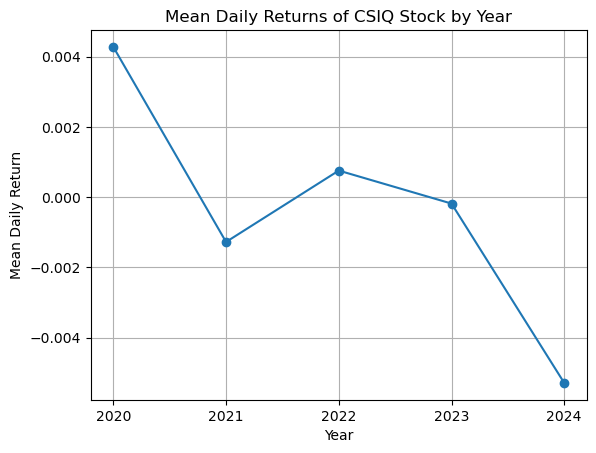

In [15]:
# # Visualizing and plotting the mean from the summary statistics
# *** Commented original code since Mean Daily Return is not necessary ***

yearly_summary_statistics_csiq['mean'].plot(marker='o', linestyle='-')
plt.title('Mean Daily Returns of CSIQ Stock by Year')
plt.xlabel('Year')
plt.ylabel('Mean Daily Return')
plt.xticks(yearly_summary_statistics_csiq.index.astype(int))
plt.grid(True)
plt.show()

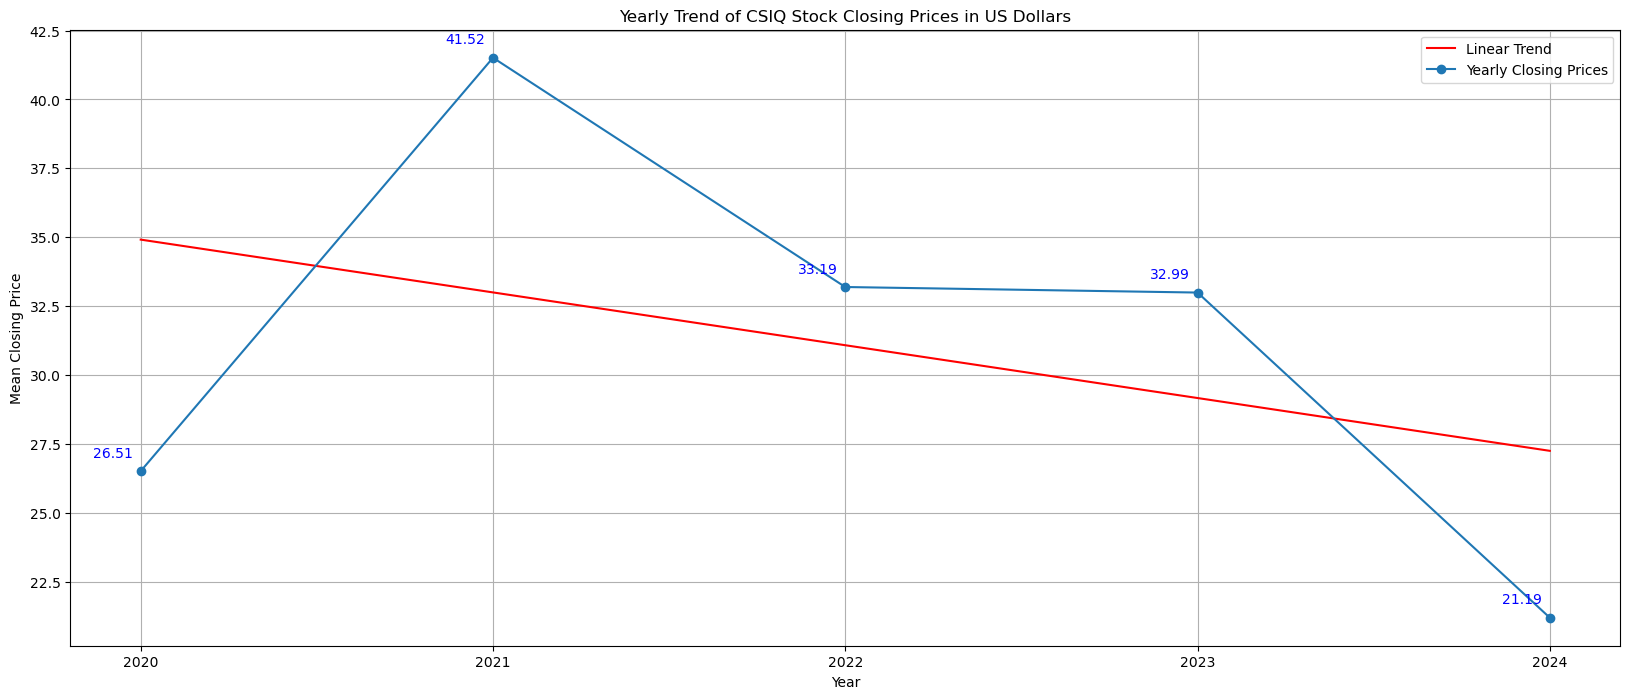

In [42]:
# Overall Yearly Trend in Stock prices from 2020 to 2024

csiq_yearly_data = csiq_df.groupby('Year').mean()

plt.figure(figsize=(20, 8))

# Linear regression for trend analysis
X = np.arange(len(csiq_yearly_data)).reshape(-1, 1)  
y = csiq_yearly_data['CSIQ_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(csiq_yearly_data.index, trend, label='Linear Trend', color='red')

# Original yearly closing prices
plt.plot(csiq_yearly_data.index, csiq_yearly_data['CSIQ_Close'],marker='o', linestyle='-', label='Yearly Closing Prices')

# Used https://matplotlib.org/stable/users/explain/text/annotations.html and 
# https://stackoverflow.com/questions/41641449/how-do-i-annotate-types-in-a-for-loop 
# as a reference for annotating data
for year, price in zip(csiq_yearly_data.index, csiq_yearly_data['CSIQ_Close']):
    plt.annotate(f'{price:.2f}', xy=(year, price), xytext=(-20, 10), textcoords='offset points', ha='center', color='blue')


plt.title('Yearly Trend of CSIQ Stock Closing Prices in US Dollars')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.xticks(csiq_yearly_data.index)  
plt.legend()
plt.grid(True)
plt.show()

DQ - Daqo New Energy Corp

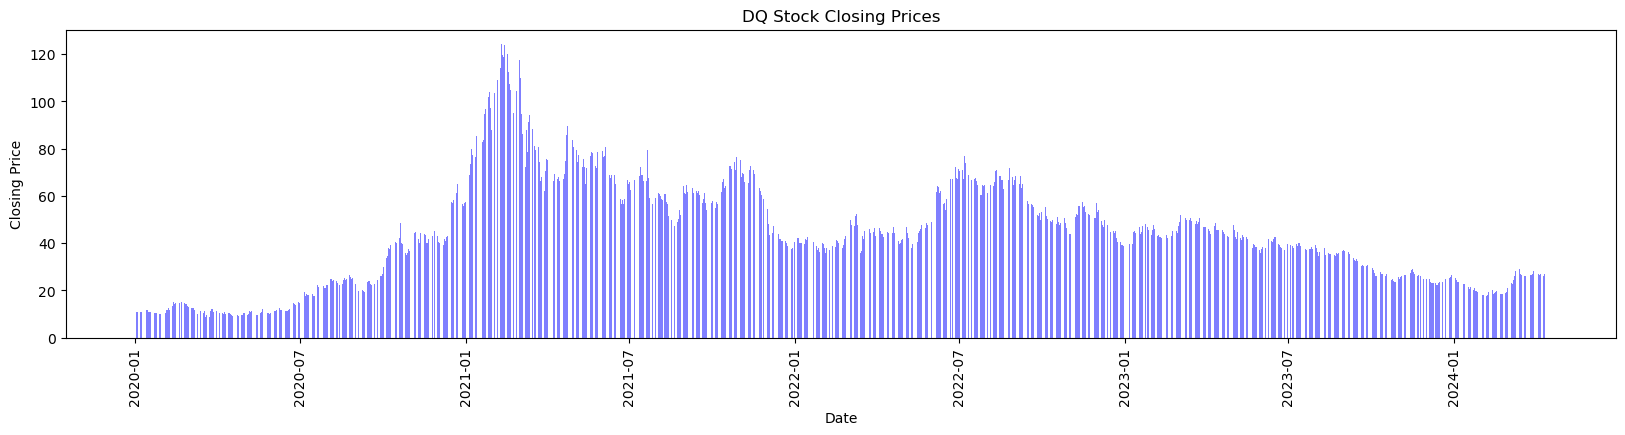

In [22]:
#**DQ Stock Closing Prices**
dq_df.reset_index(inplace=True)
plt.figure(figsize=(20, 4))
plt.bar(dq_df['Date'], dq_df["DQ_Close"], color='b', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('DQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [23]:
# #Summary Statistics
# Lesson 08 - Use the pct change function to calculate returns
dq_df['Year'] = dq_df['Date'].dt.year
dq_returns = dq_df['DQ_Close'].pct_change()
dq_df['Daily_Return'] = dq_df['DQ_Close'].pct_change()
yearly_summary_statistics_dq = dq_df.groupby('Year')['Daily_Return'].describe()
print("Summary statistics for DQ stock on a yearly basis:")
print(yearly_summary_statistics_dq)

Summary statistics for DQ stock on a yearly basis:
      count      mean       std       min       25%       50%       75%  \
Year                                                                      
2020  252.0  0.008477  0.062519 -0.226197 -0.025471  0.003648  0.038365   
2021  252.0  0.000443  0.061477 -0.147518 -0.037163 -0.006916  0.033059   
2022  251.0  0.001004  0.048999 -0.138369 -0.033291 -0.003680  0.024181   
2023  250.0 -0.001019  0.030878 -0.075498 -0.021330 -0.005599  0.018455   
2024   69.0  0.000136  0.035826 -0.076195 -0.022210 -0.002595  0.020134   

           max  
Year            
2020  0.279676  
2021  0.221266  
2022  0.171467  
2023  0.123927  
2024  0.084687  


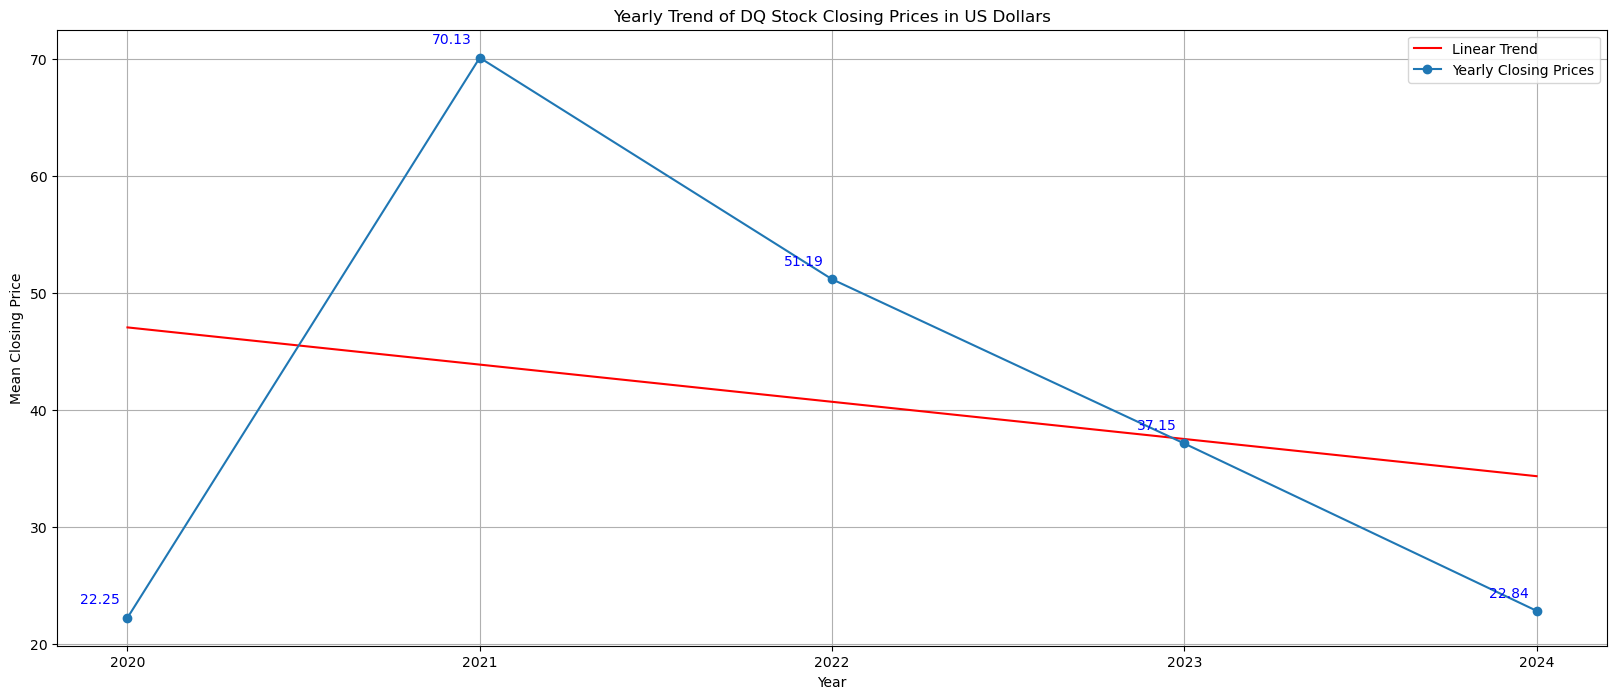

In [44]:
# Visualizing and plotting the mean from the summary statistics
dq_yearly_data = dq_df.groupby('Year').mean()
plt.figure(figsize=(20, 8))
X = np.arange(len(dq_yearly_data)).reshape(-1, 1)  
y = dq_yearly_data['DQ_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(dq_yearly_data.index, trend, label='Linear Trend', color='red')
plt.plot(dq_yearly_data.index, dq_yearly_data['DQ_Close'], marker='o', linestyle='-', label='Yearly Closing Prices')
for year, price in zip(dq_yearly_data.index, dq_yearly_data['DQ_Close']):
    plt.annotate(f'{price:.2f}', xy=(year, price), xytext=(-20, 10), textcoords='offset points', ha='center', color='blue')
plt.title('Yearly Trend of DQ Stock Closing Prices in US Dollars')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.xticks(dq_yearly_data.index)  
plt.legend()
plt.grid(True)
plt.show()

ENPH - Enphase Energy Inc

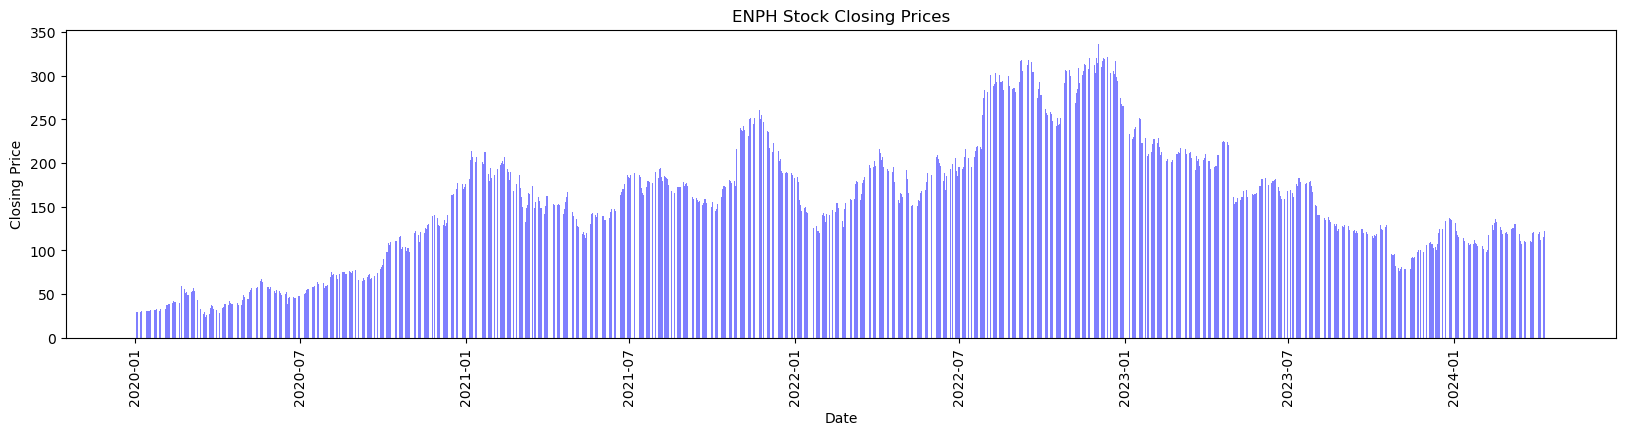

In [25]:
# MONTHLY BAR GRAPH
enph_df.reset_index(inplace=True)
plt.figure(figsize=(20, 4))
plt.bar(enph_df['Date'], enph_df["ENPH_Close"], color='b', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('ENPH Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [26]:
# Summary Statistics
enph_df['Year'] = enph_df['Date'].dt.year
enph_returns = enph_df['ENPH_Close'].pct_change()
enph_df['Daily_Return'] = enph_df['ENPH_Close'].pct_change()
yearly_summary_statistics_enph = enph_df.groupby('Year')['Daily_Return'].describe()
print("Summary statistics for ENPH stock on a yearly basis:")
print(yearly_summary_statistics_enph)

Summary statistics for ENPH stock on a yearly basis:
      count      mean       std       min       25%       50%       75%  \
Year                                                                      
2020  252.0  0.009146  0.064473 -0.260045 -0.020894  0.010102  0.035125   
2021  252.0  0.001052  0.042483 -0.141379 -0.022082 -0.000793  0.025417   
2022  251.0  0.002510  0.045800 -0.123061 -0.025288  0.002345  0.026210   
2023  250.0 -0.002014  0.038411 -0.257344 -0.022314  0.000061  0.015629   
2024   69.0 -0.000660  0.040457 -0.070459 -0.028783 -0.010271  0.020865   

           max  
Year            
2020  0.424446  
2021  0.246512  
2022  0.178945  
2023  0.163463  
2024  0.169137  


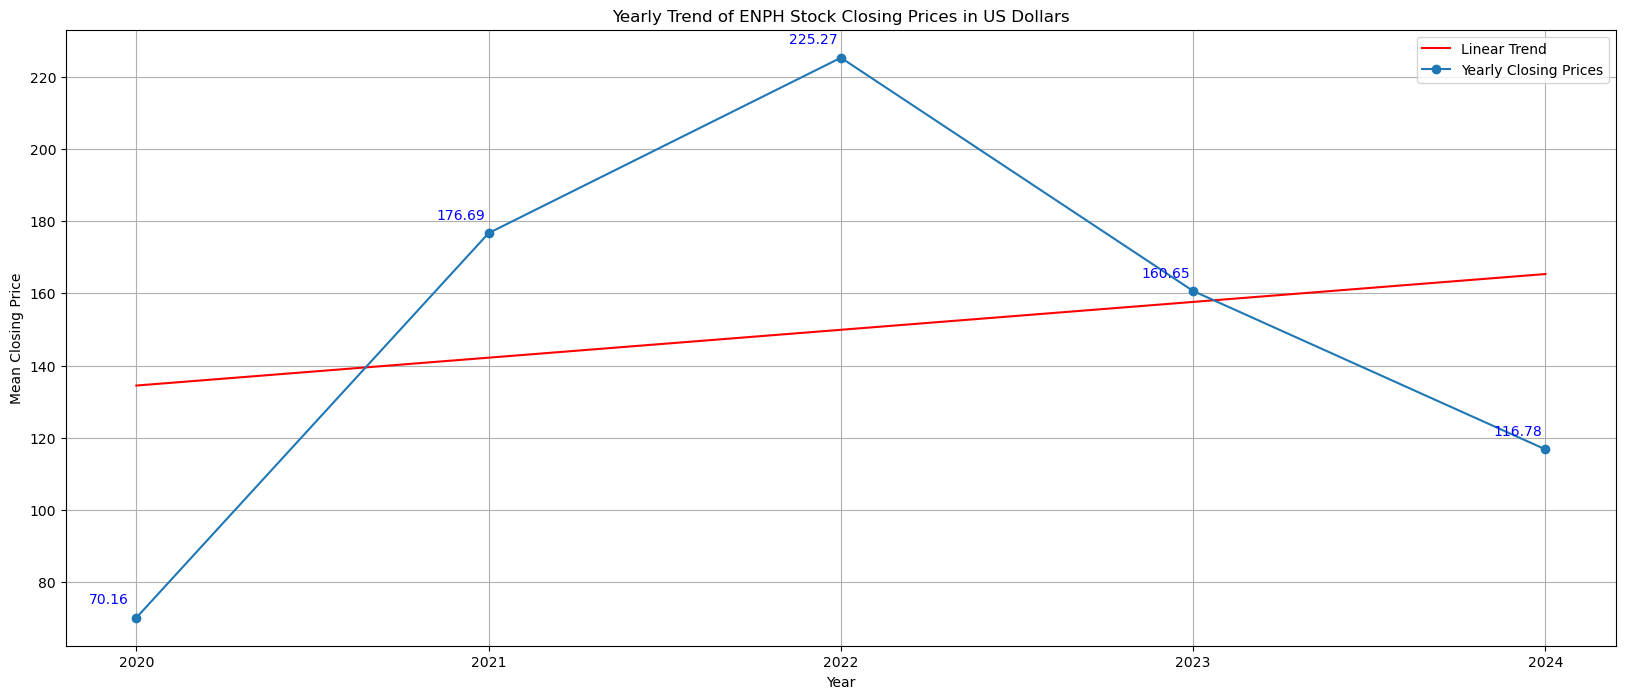

In [45]:
# Overall Yearly Trend in Stock prices from 2020 to 2024
enph_yearly_data = enph_df.groupby('Year').mean()
plt.figure(figsize=(20, 8))
X = np.arange(len(enph_yearly_data)).reshape(-1, 1)  
y = enph_yearly_data['ENPH_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(enph_yearly_data.index, trend, label='Linear Trend', color='red')
plt.plot(enph_yearly_data.index, enph_yearly_data['ENPH_Close'], marker='o', linestyle='-', label='Yearly Closing Prices')
for year, price in zip(enph_yearly_data.index, enph_yearly_data['ENPH_Close']):
    plt.annotate(f'{price:.2f}', xy=(year, price), xytext=(-20, 10), textcoords='offset points', ha='center', color='blue')
plt.title('Yearly Trend of ENPH Stock Closing Prices in US Dollars')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.xticks(enph_yearly_data.index)  
plt.legend()
plt.grid(True)
plt.show()

FSLR - First Solar INC

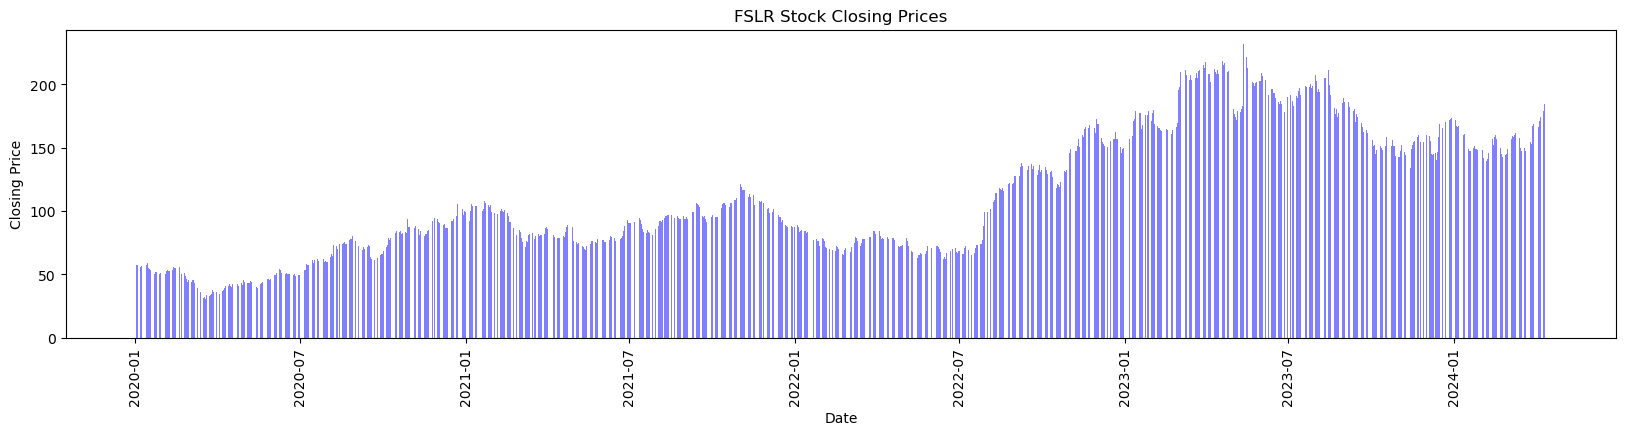

In [28]:
# MONTHLY BAR GRAPH
fslr_df.reset_index(inplace=True)
plt.figure(figsize=(20, 4))
plt.bar(fslr_df['Date'], fslr_df["FSLR_Close"], color='b', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('FSLR Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [29]:
# Summary Statistics 
fslr_df['Year'] = fslr_df['Date'].dt.year
fslr_returns = fslr_df['FSLR_Close'].pct_change()
fslr_df['Daily_Return'] = fslr_df['FSLR_Close'].pct_change()
yearly_summary_statistics_fslr = fslr_df.groupby('Year')['Daily_Return'].describe()
print("Summary statistics for FSLR stock on a yearly basis:")
print(yearly_summary_statistics_fslr)

Summary statistics for FSLR stock on a yearly basis:
      count      mean       std       min       25%       50%       75%  \
Year                                                                      
2020  252.0  0.002917  0.038634 -0.147168 -0.018666  0.002900  0.024002   
2021  252.0 -0.000093  0.028535 -0.123267 -0.013466 -0.001340  0.013556   
2022  251.0  0.002684  0.032638 -0.086712 -0.017542  0.001105  0.020660   
2023  250.0  0.001113  0.034113 -0.090873 -0.016645 -0.000651  0.015118   
2024   69.0  0.001363  0.025046 -0.070681 -0.013187  0.002418  0.012183   

           max  
Year            
2020  0.132540  
2021  0.081706  
2022  0.152944  
2023  0.264752  
2024  0.093301  


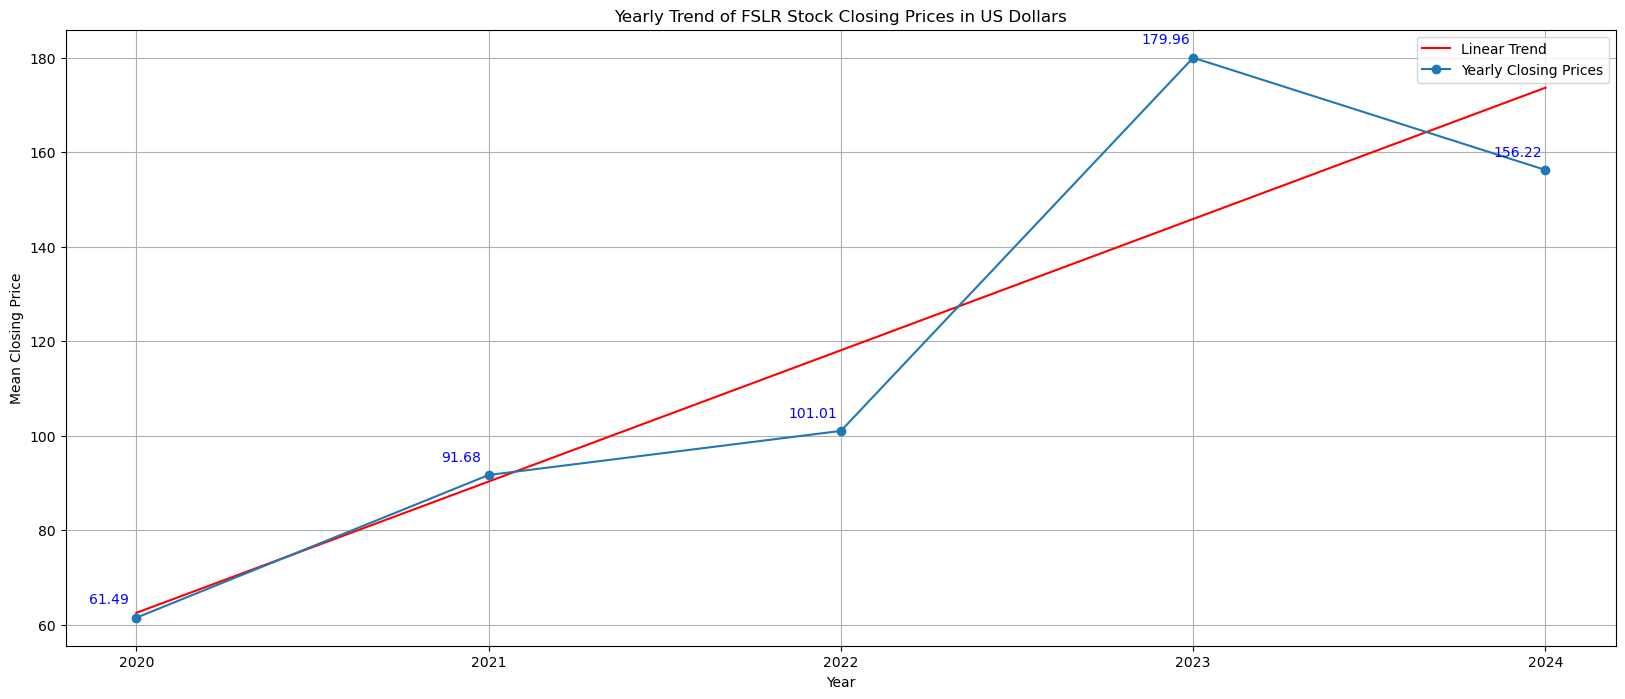

In [46]:
# Overall Yearly Trend in Stock prices from 2020 to 2024
fslr_yearly_data = fslr_df.groupby('Year').mean()
plt.figure(figsize=(20, 8))
X = np.arange(len(fslr_yearly_data)).reshape(-1, 1)  
y = fslr_yearly_data['FSLR_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(fslr_yearly_data.index, trend, label='Linear Trend', color='red')
plt.plot(fslr_yearly_data.index, fslr_yearly_data['FSLR_Close'], marker='o', linestyle='-', label='Yearly Closing Prices')
for year, price in zip(fslr_yearly_data.index, fslr_yearly_data['FSLR_Close']):
    plt.annotate(f'{price:.2f}', xy=(year, price), xytext=(-20, 10), textcoords='offset points', ha='center', color='blue')
plt.title('Yearly Trend of FSLR Stock Closing Prices in US Dollars')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.xticks(fslr_yearly_data.index)  
plt.legend()
plt.grid(True)
plt.show()

JKS - JinkoSolar Holding Co., Ltd

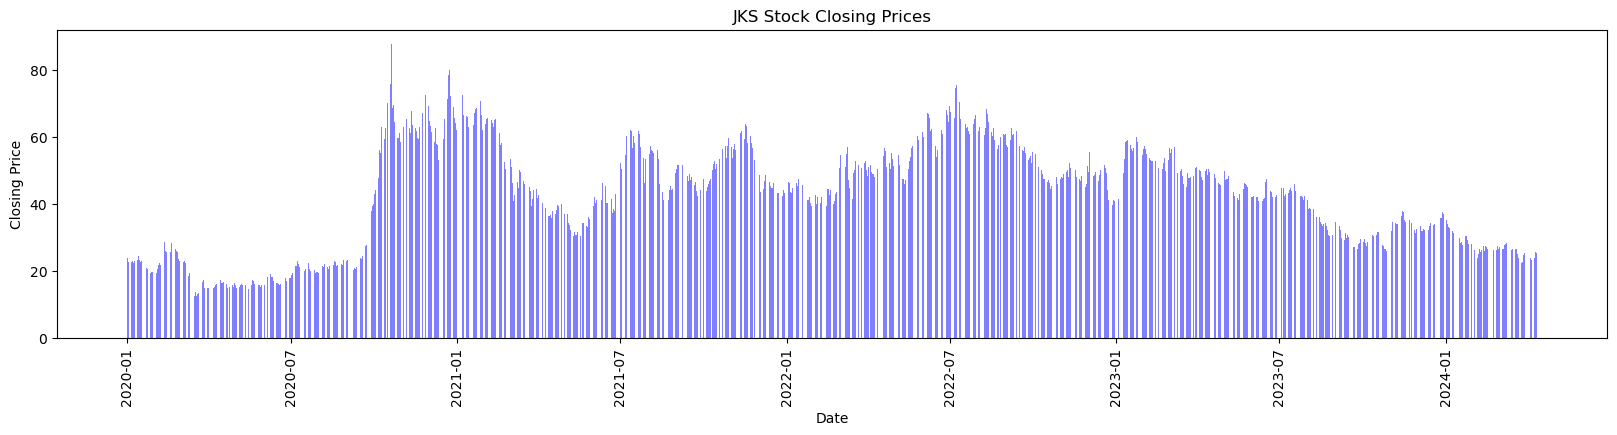

In [31]:
jks_df.reset_index(inplace=True)
plt.figure(figsize=(20, 4))
plt.bar(jks_df['Date'], jks_df["JKS_Close"], color='b', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('JKS Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [32]:
# Summary Statistics 
jks_df['Year'] = jks_df['Date'].dt.year
jks_returns = jks_df['JKS_Close'].pct_change()
jks_df['Daily_Return'] = jks_df['JKS_Close'].pct_change()
yearly_summary_statistics_jks = jks_df.groupby('Year')['Daily_Return'].describe()
print("Summary statistics for JKS stock on a yearly basis:")
print(yearly_summary_statistics_jks)

Summary statistics for JKS stock on a yearly basis:
      count      mean       std       min       25%       50%       75%  \
Year                                                                      
2020  252.0  0.005846  0.064255 -0.290063 -0.029389  0.000088  0.039202   
2021  252.0  0.000370  0.056175 -0.142804 -0.035955 -0.002150  0.033206   
2022  251.0  0.000665  0.047956 -0.174737 -0.031514 -0.000423  0.025004   
2023  250.0  0.000281  0.037378 -0.127849 -0.021983 -0.003308  0.016831   
2024   69.0 -0.004809  0.036392 -0.089204 -0.028782 -0.010938  0.017984   

           max  
Year            
2020  0.284395  
2021  0.229070  
2022  0.188771  
2023  0.155617  
2024  0.099067  


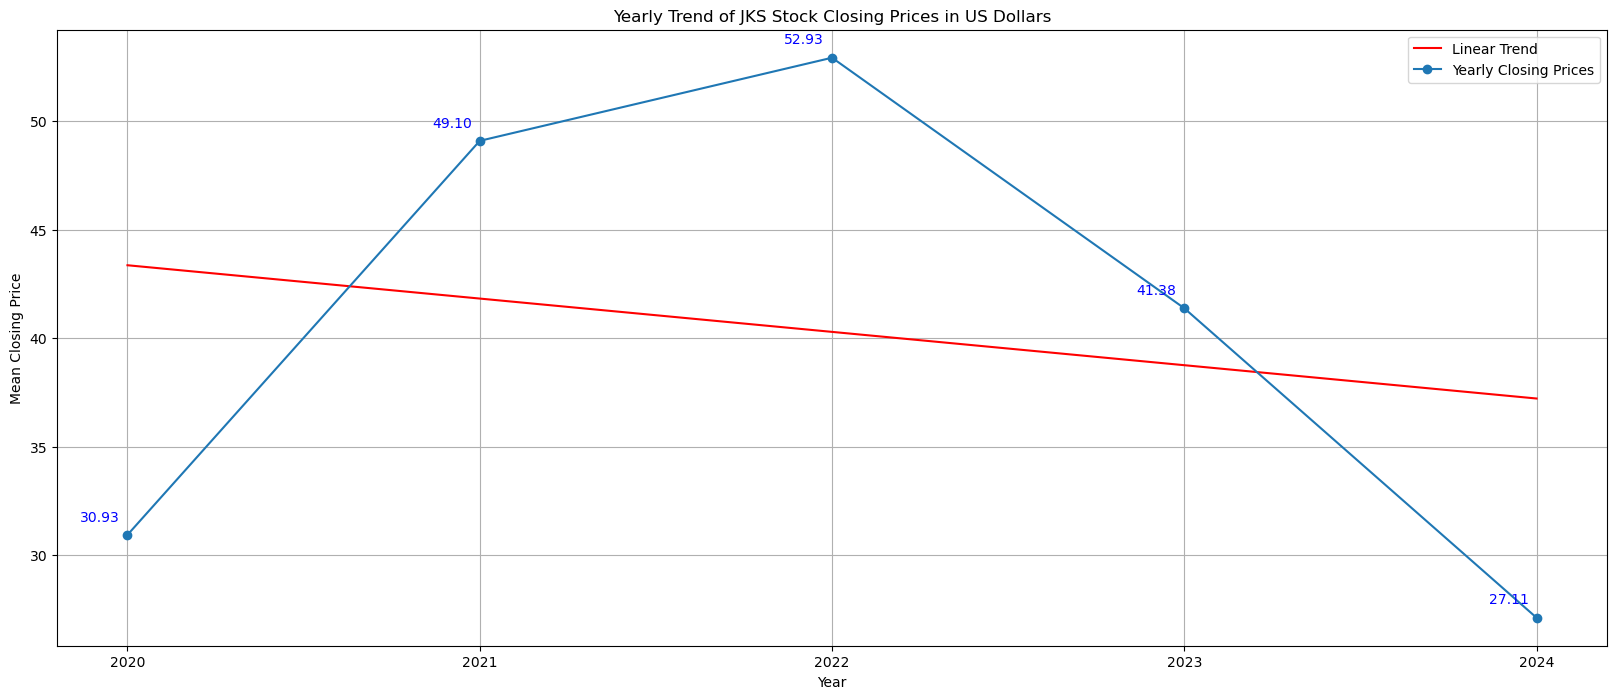

In [47]:
# Overall Yearly Trend in Stock prices from 2020 to 2024
jks_yearly_data = jks_df.groupby('Year').mean()
plt.figure(figsize=(20, 8))
X = np.arange(len(jks_yearly_data)).reshape(-1, 1)  
y = jks_yearly_data['JKS_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(jks_yearly_data.index, trend, label='Linear Trend', color='red')
plt.plot(jks_yearly_data.index, jks_yearly_data['JKS_Close'], marker='o', linestyle='-', label='Yearly Closing Prices')
for year, price in zip(jks_yearly_data.index, jks_yearly_data['JKS_Close']):
    plt.annotate(f'{price:.2f}', xy=(year, price), xytext=(-20, 10), textcoords='offset points', ha='center', color='blue')
plt.title('Yearly Trend of JKS Stock Closing Prices in US Dollars')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.xticks(jks_yearly_data.index)  
plt.legend()
plt.grid(True)
plt.show()


SEDG - Solaredge Technologies Inc

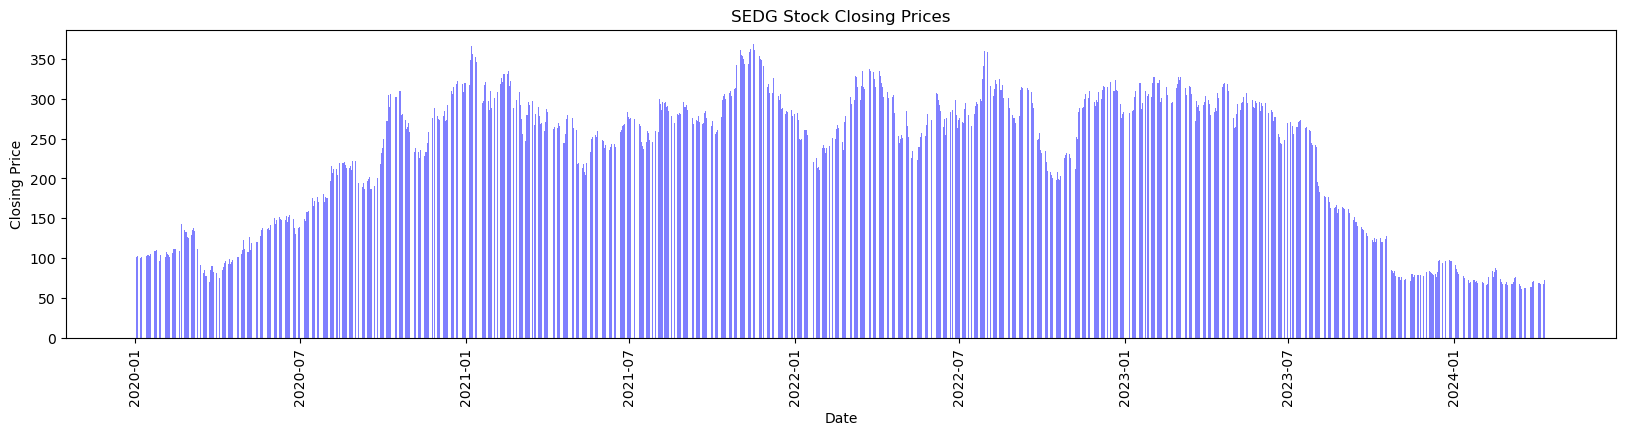

In [34]:
sedg_df.reset_index(inplace=True)
plt.figure(figsize=(20, 4))
plt.bar(sedg_df['Date'], sedg_df["SEDG_Close"], color='b', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('SEDG Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [35]:
# Summary Statistics
sedg_df['Year'] = sedg_df['Date'].dt.year
sedg_returns = sedg_df['SEDG_Close'].pct_change()
sedg_df['Daily_Return'] = sedg_df['SEDG_Close'].pct_change()
yearly_summary_statistics_sedg = sedg_df.groupby('Year')['Daily_Return'].describe()
print("Summary statistics for SEDG stock on a yearly basis:")
print(yearly_summary_statistics_sedg)

Summary statistics for SEDG stock on a yearly basis:
      count      mean       std       min       25%       50%       75%  \
Year                                                                      
2020  252.0  0.005940  0.052853 -0.229157 -0.018226  0.005363  0.032557   
2021  252.0  0.000253  0.039058 -0.159540 -0.021825  0.000215  0.019906   
2022  251.0  0.001023  0.044700 -0.191265 -0.025537 -0.002298  0.024608   
2023  250.0 -0.003584  0.040025 -0.272679 -0.023470 -0.002228  0.017077   
2024   69.0 -0.003103  0.044177 -0.121772 -0.031548 -0.008795  0.022425   

           max  
Year            
2020  0.227835  
2021  0.163317  
2022  0.191339  
2023  0.165961  
2024  0.130603  


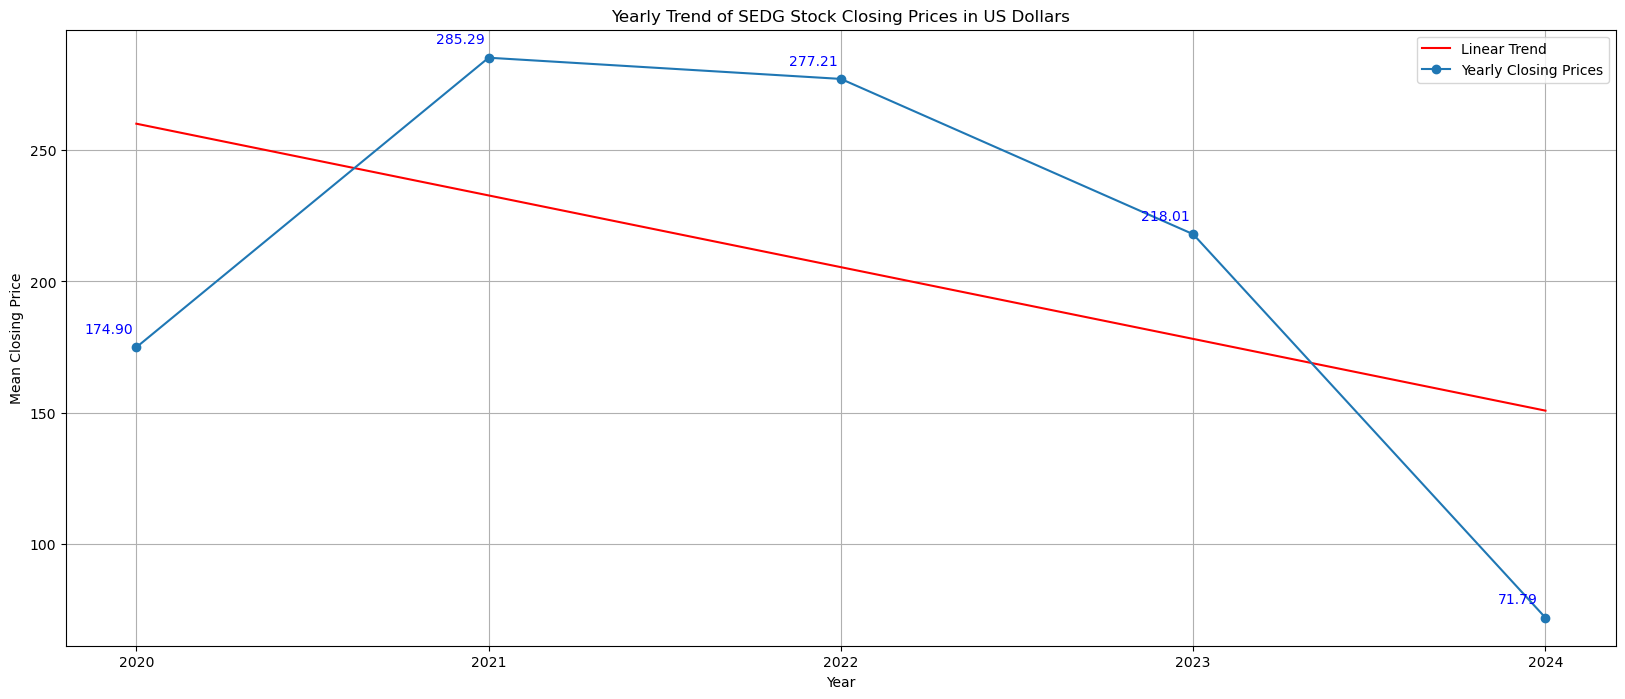

In [48]:
# Overall Yearly Trend in Stock prices from 2020 to 2024
sedg_yearly_data = sedg_df.groupby('Year').mean()
plt.figure(figsize=(20, 8))
X = np.arange(len(sedg_yearly_data)).reshape(-1, 1)  
y = sedg_yearly_data['SEDG_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(sedg_yearly_data.index, trend, label='Linear Trend', color='red')
plt.plot(sedg_yearly_data.index, sedg_yearly_data['SEDG_Close'], marker='o', linestyle='-', label='Yearly Closing Prices')
for year, price in zip(sedg_yearly_data.index, sedg_yearly_data['SEDG_Close']):
    plt.annotate(f'{price:.2f}', xy=(year, price), xytext=(-20, 10), textcoords='offset points', ha='center', color='blue')
plt.title('Yearly Trend of SEDG Stock Closing Prices in US Dollars')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.xticks(sedg_yearly_data.index)  
plt.legend()
plt.grid(True)
plt.show()


SPWR - SunPower Coporation

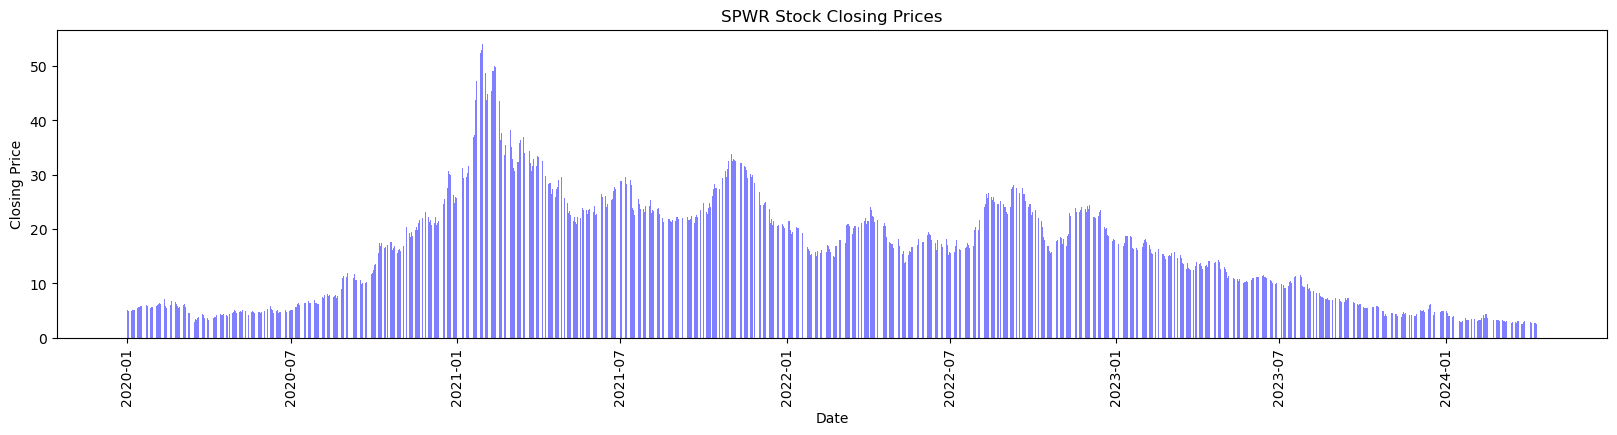

In [37]:
# MONTHLY BAR GRAPH
spwr_df.reset_index(inplace=True)
plt.figure(figsize=(20, 4))
plt.bar(spwr_df['Date'], spwr_df["SPWR_Close"], color='b', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('SPWR Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [38]:
# Summary Statistics 
spwr_df['Year'] = spwr_df['Date'].dt.year
spwr_returns = spwr_df['SPWR_Close'].pct_change()
spwr_df['Daily_Return'] = spwr_df['SPWR_Close'].pct_change()
yearly_summary_statistics_spwr = spwr_df.groupby('Year')['Daily_Return'].describe()
print("Summary statistics for SPWR stock on a yearly basis:")
print(yearly_summary_statistics_spwr)

Summary statistics for SPWR stock on a yearly basis:
      count      mean       std       min       25%       50%       75%  \
Year                                                                      
2020  252.0  0.008203  0.060174 -0.195322 -0.028248  0.010935  0.038974   
2021  252.0  0.000507  0.051659 -0.166934 -0.027065  0.000665  0.031549   
2022  251.0  0.000567  0.048466 -0.169295 -0.026672 -0.004278  0.025023   
2023  250.0 -0.003932  0.050718 -0.312704 -0.029084 -0.005069  0.016102   
2024   69.0 -0.006860  0.069961 -0.154206 -0.055385 -0.017241  0.022508   

           max  
Year            
2020  0.238866  
2021  0.201698  
2022  0.195822  
2023  0.178330  
2024  0.221122  


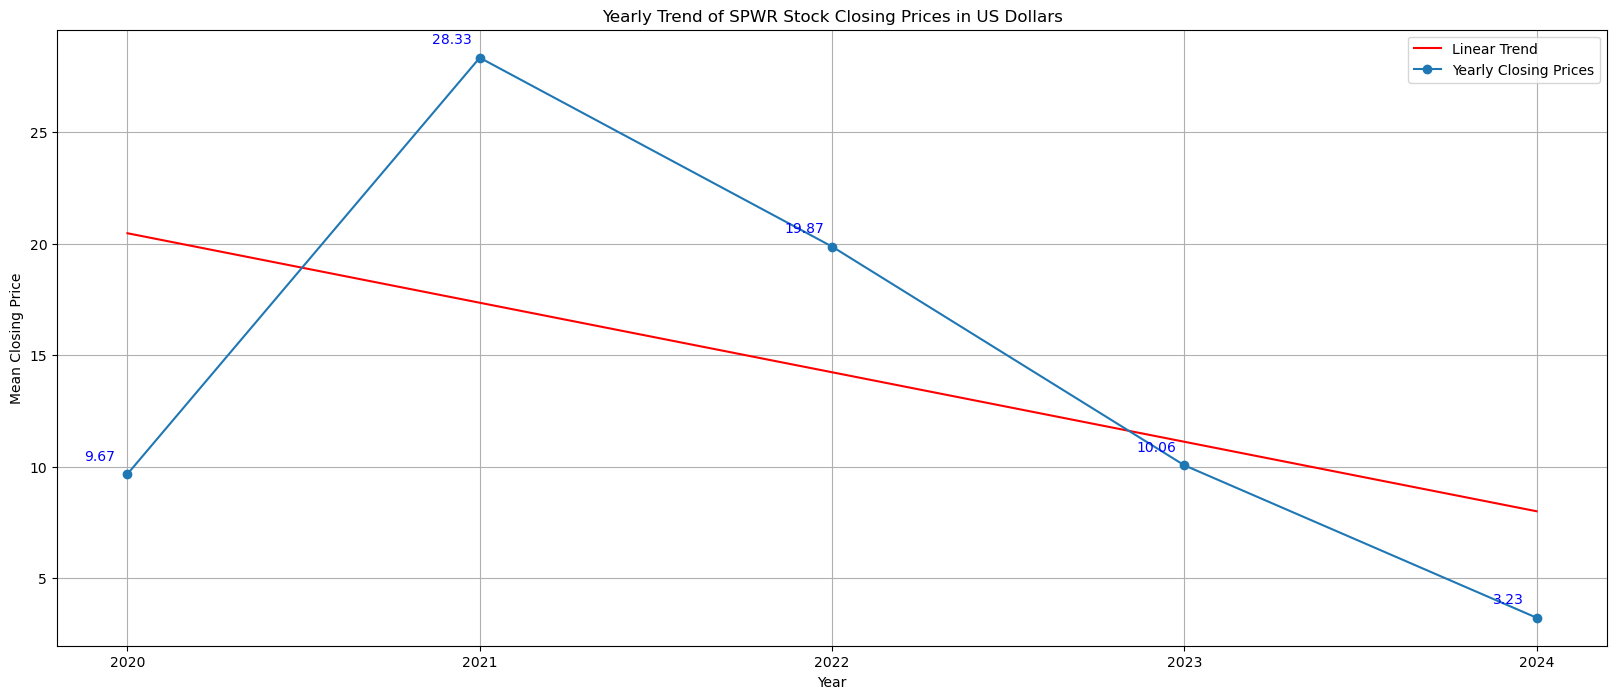

In [49]:
spwr_yearly_data = spwr_df.groupby('Year').mean()
plt.figure(figsize=(20, 8))
X = np.arange(len(spwr_yearly_data)).reshape(-1, 1)  
y = spwr_yearly_data['SPWR_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(spwr_yearly_data.index, trend, label='Linear Trend', color='red')
plt.plot(spwr_yearly_data.index, spwr_yearly_data['SPWR_Close'], marker='o', linestyle='-', label='Yearly Closing Prices')

# Used https://matplotlib.org/stable/users/explain/text/annotations.html and 
# https://stackoverflow.com/questions/41641449/how-do-i-annotate-types-in-a-for-loop 
# as a reference for annotating data

for year, price in zip(spwr_yearly_data.index, spwr_yearly_data['SPWR_Close']):
    plt.annotate(f'{price:.2f}', xy=(year, price), xytext=(-20, 10), textcoords='offset points', ha='center', color='blue')


plt.title('Yearly Trend of SPWR Stock Closing Prices in US Dollars')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.xticks(spwr_yearly_data.index)  
plt.legend()
plt.grid(True)
plt.show()